In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [12]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0


In [13]:
!unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, LeakyReLU
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/train',
    labels='inferred',
    label_mode='int',
    image_size=(224,224)
)

valid_data = keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/validation',
    labels='inferred',
    label_mode='int',
    image_size=(224,224)
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [16]:
class_names = train_data.class_names
class_map = {i: class_names[i] for i in range(len(class_names))}
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [17]:
def process(image, label):
  tf.cast(image/223., tf.float32)
  return image, label

train_data = train_data.map(process)
valid_data = valid_data.map(process)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,603,471 (21.38 MB)

 Trainable params: 5,603,471 (21.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.2471 - loss: 17.8646 - val_accuracy: 0.4903 - val_loss: 1.6791
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5816 - loss: 1.3495 - val_accuracy: 0.5690 - val_loss: 1.5441
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7678 - loss: 0.7331 - val_accuracy: 0.6140 - val_loss: 1.6234
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8317 - loss: 0.5240 - val_accuracy: 0.6307 - val_loss: 1.7455
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8665 - loss: 0.4200 - val_accuracy: 0.6443 - val_loss: 1.8297
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9024 - loss: 0.3098 - val_accuracy: 0.6500 - val_loss: 2.6084
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9210 - loss: 0.2688 - val_accuracy: 0.6483 - val_loss: 2.3645
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9205 - loss: 0.2753 -

In [ ]:
model2 = Sequential([
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,448,623 (24.60 MB)

 Trainable params: 6,448,399 (24.60 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.4429 - loss: 2.8481 - val_accuracy: 0.6903 - val_loss: 0.9859
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.6874 - loss: 1.0010 - val_accuracy: 0.6667 - val_loss: 1.1971
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7892 - loss: 0.6834 - val_accuracy: 0.8313 - val_loss: 0.7428
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8416 - loss: 0.5192 - val_accuracy: 0.8440 - val_loss: 0.7037
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8761 - loss: 0.4232 - val_accuracy: 0.8267 - val_loss: 0.7247
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8922 - loss: 0.3466 - val_accuracy: 0.7943 - val_loss: 1.3346
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9132 - loss: 0.2962 - val_accuracy: 0.8917 - val_loss: 0.4067
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9169 - loss: 0.2977 - 

In [ ]:
model2.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9421 - loss: 0.1955 - val_accuracy: 0.9413 - val_loss: 0.2902
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9470 - loss: 0.1826 - val_accuracy: 0.9000 - val_loss: 0.4180
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9502 - loss: 0.1692 - val_accuracy: 0.9353 - val_loss: 0.2727
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9576 - loss: 0.1381 - val_accuracy: 0.9237 - val_loss: 0.4380
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9593 - loss: 0.1456 - val_accuracy: 0.8753 - val_loss: 0.6909


In [ ]:
model3 = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,470,255 (24.68 MB)

 Trainable params: 6,469,999 (24.68 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.2904 - loss: 2.9148 - val_accuracy: 0.5560 - val_loss: 1.6291
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.5217 - loss: 1.5755 - val_accuracy: 0.5713 - val_loss: 1.4798
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6227 - loss: 1.2336 - val_accuracy: 0.7373 - val_loss: 0.8498
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6867 - loss: 0.9982 - val_accuracy: 0.8250 - val_loss: 0.6496
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7628 - loss: 0.8028 - val_accuracy: 0.7530 - val_loss: 1.0297
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.8113 - loss: 0.6259 - val_accuracy: 0.8420 - val_loss: 0.5877
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8402 - loss: 0.5688 - val_accuracy: 0.8930 - val_loss: 0.4237
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.8605 - loss: 0.4890 - 

In [ ]:
model3.fit(train_data, epochs=7, validation_data=valid_data)

Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9027 - loss: 0.3306 - val_accuracy: 0.9250 - val_loss: 0.2949
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9120 - loss: 0.3032 - val_accuracy: 0.9040 - val_loss: 0.3444
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9157 - loss: 0.2913 - val_accuracy: 0.7833 - val_loss: 1.3502
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9330 - loss: 0.2518 - val_accuracy: 0.9453 - val_loss: 0.2271
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9347 - loss: 0.2455 - val_accuracy: 0.9477 - val_loss: 0.1912
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9459 - loss: 0.2146 - val_accuracy: 0.9260 - val_loss: 0.3335
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9445 - loss: 0.2017 - val_accuracy: 0.8907 - val_loss: 0.4487


In [ ]:
model4 = Sequential([
    Conv2D(32, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(164, activation='relu'),
    Dropout(0.2),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 106, 106, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 106, 106, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 49, 49, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 49, 49, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 164)                 │          21,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 164)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 15)                  │           2,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,822,191 (18.40 MB)

 Trainable params: 4,821,935 (18.39 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model4.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model4.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.4705 - loss: 1.7275 - val_accuracy: 0.7060 - val_loss: 1.0399
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8411 - loss: 0.5049 - val_accuracy: 0.9023 - val_loss: 0.3091
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9027 - loss: 0.3081 - val_accuracy: 0.7200 - val_loss: 1.2604
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9388 - loss: 0.2029 - val_accuracy: 0.9460 - val_loss: 0.1856
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9591 - loss: 0.1273 - val_accuracy: 0.9430 - val_loss: 0.2039
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9636 - loss: 0.1111 - val_accuracy: 0.9370 - val_loss: 0.2269
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9737 - loss: 0.0782 - val_accuracy: 0.9193 - val_loss: 0.2992
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9843 - loss: 0.0559 - 

In [ ]:
model5 = Sequential([
    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 106, 106, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 49, 49, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,243,663 (4.74 MB)

 Trainable params: 1,243,663 (4.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model5.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.0672 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.0666 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.0666 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.0660 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0656 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.0662 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.0667 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0664 - loss: nan - val_accuracy: 0.0667 - val_loss: nan
Epoch 9/

In [ ]:
model6 = Sequential([
    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model6.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 106, 106, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 49, 49, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,243,663 (4.74 MB)

 Trainable params: 1,243,663 (4.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model6.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model6.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.2047 - loss: 5.1550 - val_accuracy: 0.6250 - val_loss: 1.1373
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.6275 - loss: 1.1271 - val_accuracy: 0.6873 - val_loss: 1.0516
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7695 - loss: 0.7117 - val_accuracy: 0.7637 - val_loss: 0.8918
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8441 - loss: 0.4834 - val_accuracy: 0.7677 - val_loss: 0.8916
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8863 - loss: 0.3606 - val_accuracy: 0.7933 - val_loss: 1.0141
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9128 - loss: 0.2708 - val_accuracy: 0.7303 - val_loss: 1.4480
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9118 - loss: 0.2988 - val_accuracy: 0.7227 - val_loss: 1.3226
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9192 - loss: 0.2689 - 

In [ ]:
model7 = Sequential([
    Conv2D(16, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,497,647 (24.79 MB)

 Trainable params: 6,497,423 (24.79 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model7.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model7.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.3335 - loss: 2.9995 - val_accuracy: 0.5937 - val_loss: 1.5695
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6274 - loss: 1.2464 - val_accuracy: 0.7297 - val_loss: 0.9760
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7379 - loss: 0.8743 - val_accuracy: 0.7967 - val_loss: 0.6876
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8170 - loss: 0.5961 - val_accuracy: 0.7727 - val_loss: 0.8814
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8557 - loss: 0.4785 - val_accuracy: 0.8683 - val_loss: 0.4747
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8817 - loss: 0.3804 - val_accuracy: 0.8363 - val_loss: 0.5996
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9045 - loss: 0.3297 - val_accuracy: 0.6920 - val_loss: 1.7495
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9176 - loss: 0.2810 - 

In [ ]:
model7.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9360 - loss: 0.2323 - val_accuracy: 0.8220 - val_loss: 0.6882
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9413 - loss: 0.2027 - val_accuracy: 0.9440 - val_loss: 0.2195
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9578 - loss: 0.1536 - val_accuracy: 0.9267 - val_loss: 0.3748
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9554 - loss: 0.1559 - val_accuracy: 0.8933 - val_loss: 0.4901
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9652 - loss: 0.1245 - val_accuracy: 0.8683 - val_loss: 0.5999


In [ ]:
import numpy as np
y_true = np.concatenate([y for x, y in valid_data], axis=0)  # True labels
y_pred = model7.predict(valid_data)  # Predictions (raw probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


In [ ]:
# print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

        Bean       0.06      0.07      0.07       200
Bitter_Gourd       0.08      0.07      0.08       200
Bottle_Gourd       0.07      0.06      0.06       200
     Brinjal       0.05      0.06      0.06       200
    Broccoli       0.08      0.09      0.09       200
     Cabbage       0.09      0.10      0.09       200
    Capsicum       0.08      0.10      0.09       200
      Carrot       0.05      0.05      0.05       200
 Cauliflower       0.06      0.03      0.04       200
    Cucumber       0.07      0.07      0.07       200
      Papaya       0.08      0.09      0.08       200
      Potato       0.08      0.10      0.09       200
     Pumpkin       0.06      0.06      0.06       200
      Radish       0.09      0.09      0.09       200
      Tomato       0.06      0.05      0.05       200

    accuracy                           0.07      3000
   macro avg       0.07      0.07      0.07      3000
weighted avg       0.07   

In [ ]:
# report = classification_report(y_true, y_pred_classes, output_dict=True)

# # Extract accuracy for each class
# for class_label, metrics in report.items():
#     if class_label.isdigit():  # Only numeric class labels
#         print(f"Class {class_label}: Accuracy (Recall) = {metrics['recall']:.2f}")

Class 0: Accuracy (Recall) = 0.07
Class 1: Accuracy (Recall) = 0.07
Class 2: Accuracy (Recall) = 0.10
Class 3: Accuracy (Recall) = 0.07
Class 4: Accuracy (Recall) = 0.07
Class 5: Accuracy (Recall) = 0.07
Class 6: Accuracy (Recall) = 0.09
Class 7: Accuracy (Recall) = 0.07
Class 8: Accuracy (Recall) = 0.06
Class 9: Accuracy (Recall) = 0.08
Class 10: Accuracy (Recall) = 0.09
Class 11: Accuracy (Recall) = 0.08
Class 12: Accuracy (Recall) = 0.06
Class 13: Accuracy (Recall) = 0.07
Class 14: Accuracy (Recall) = 0.06


In [ ]:
model8 = Sequential([
    Conv2D(32, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model8.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 106, 106, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 106, 106, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 49, 49, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,807,791 (18.34 MB)

 Trainable params: 4,807,535 (18.34 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model8.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy',patience=5, restore_best_weights=True)
model8.fit(train_data, epochs=25, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.3375 - loss: 2.6858 - val_accuracy: 0.3800 - val_loss: 2.5097
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.6770 - loss: 1.0980 - val_accuracy: 0.5257 - val_loss: 1.9762
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7896 - loss: 0.7121 - val_accuracy: 0.7897 - val_loss: 0.8182
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8551 - loss: 0.4894 - val_accuracy: 0.7500 - val_loss: 0.9083
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8833 - loss: 0.3785 - val_accuracy: 0.8967 - val_loss: 0.3658
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.8981 - loss: 0.3348 - val_accuracy: 0.7413 - val_loss: 1.1074
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9324 - loss: 0.2140 - val_accuracy: 0.7853 - val_loss: 1.2979
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9331 - loss: 0.2211 - 

In [ ]:
model9 = Sequential([
    Conv2D(16, kernel_size=(5,5), padding='same', input_shape=(224,224,3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model9.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 224, 224, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 112, 112, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 56, 56, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │              

 Total params: 6,497,647 (24.79 MB)

 Trainable params: 6,497,423 (24.79 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model9.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.3381 - loss: 2.8719 - val_accuracy: 0.4880 - val_loss: 2.0356
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.6415 - loss: 1.1891 - val_accuracy: 0.7413 - val_loss: 0.8599
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7283 - loss: 0.8703 - val_accuracy: 0.5417 - val_loss: 1.9115
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7918 - loss: 0.6771 - val_accuracy: 0.7897 - val_loss: 0.6750
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8311 - loss: 0.5536 - val_accuracy: 0.8250 - val_loss: 0.6282
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8670 - loss: 0.4584 - val_accuracy: 0.8777 - val_loss: 0.4410
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8911 - loss: 0.3822 - val_accuracy: 0.9053 - val_loss: 0.3651
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8934 - loss: 0.3773 - 

In [ ]:
model9.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9239 - loss: 0.2544 - val_accuracy: 0.8687 - val_loss: 0.5708
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9271 - loss: 0.2606 - val_accuracy: 0.8240 - val_loss: 0.7554
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9312 - loss: 0.2478 - val_accuracy: 0.6837 - val_loss: 1.5707
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9415 - loss: 0.2098 - val_accuracy: 0.9413 - val_loss: 0.3105
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9449 - loss: 0.1920 - val_accuracy: 0.6103 - val_loss: 2.6596


In [ ]:
model10 = Sequential([
    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model10.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 112, 112, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 56, 56, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,511,727 (24.84 MB)

 Trainable params: 6,511,471 (24.84 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model10.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.3422 - loss: 2.4820 - val_accuracy: 0.4343 - val_loss: 2.3143
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.6244 - loss: 1.2211 - val_accuracy: 0.7357 - val_loss: 0.8845
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7378 - loss: 0.8431 - val_accuracy: 0.8427 - val_loss: 0.6273
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8052 - loss: 0.6410 - val_accuracy: 0.8787 - val_loss: 0.4054
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8438 - loss: 0.5214 - val_accuracy: 0.8977 - val_loss: 0.3879
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8767 - loss: 0.4124 - val_accuracy: 0.7083 - val_loss: 1.7208
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8951 - loss: 0.3570 - val_accuracy: 0.8943 - val_loss: 0.3593
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9057 - loss: 0.3137 - 

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)
model10.fit(train_data, epochs=10, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9300 - loss: 0.2379 - val_accuracy: 0.5607 - val_loss: 6.2619
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9357 - loss: 0.2098 - val_accuracy: 0.9213 - val_loss: 0.3171
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9410 - loss: 0.1977 - val_accuracy: 0.9433 - val_loss: 0.2201
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9383 - loss: 0.2117 - val_accuracy: 0.9373 - val_loss: 0.2416
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9479 - loss: 0.1712 - val_accuracy: 0.9113 - val_loss: 0.3173
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9575 - loss: 0.1367 - val_accuracy: 0.7817 - val_loss: 1.1074


In [ ]:
model11 = Sequential([
    Conv2D(16, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model11.compile(optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.86, amsgrad=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
model11.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.0742 - loss: 6.4971 - val_accuracy: 0.0667 - val_loss: 2.7086
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.0618 - loss: 2.7105 - val_accuracy: 0.0667 - val_loss: 2.7086
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.0602 - loss: 2.7106 - val_accuracy: 0.0667 - val_loss: 2.7085
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.0610 - loss: 2.7098 - val_accuracy: 0.0667 - val_loss: 2.7086
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.0586 - loss: 2.7129 - val_accuracy: 0.0667 - val_loss: 2.7086
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.0597 - loss: 2.7097 - val_accuracy: 0.0667 - val_loss: 2.7086


In [ ]:
model11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
model11.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.0618 - loss: 2.7110 - val_accuracy: 0.0667 - val_loss: 2.7082
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.0627 - loss: 2.7157 - val_accuracy: 0.0673 - val_loss: 2.7065
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.0574 - loss: 2.7087 - val_accuracy: 0.0667 - val_loss: 2.7081
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.0580 - loss: 2.7090 - val_accuracy: 0.0667 - val_loss: 2.7081
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.0582 - loss: 2.7085 - val_accuracy: 0.0667 - val_loss: 2.7081
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.0590 - loss: 2.7087 - val_accuracy: 0.0667 - val_loss: 2.7081
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.0594 - loss: 2.7085 - val_accuracy: 0.0667 - val_loss: 2.7081


In [ ]:
model12 = Sequential([
    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model12.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 112, 112, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 56, 56, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,511,727 (24.84 MB)

 Trainable params: 6,511,471 (24.84 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
model12.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[early_stop])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.2947 - loss: 2.9375 - val_accuracy: 0.4253 - val_loss: 1.8479
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.5511 - loss: 1.4764 - val_accuracy: 0.7073 - val_loss: 0.9924
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7105 - loss: 0.9838 - val_accuracy: 0.6160 - val_loss: 1.4722
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.7986 - loss: 0.6813 - val_accuracy: 0.7560 - val_loss: 1.0641
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.8438 - loss: 0.5231 - val_accuracy: 0.8583 - val_loss: 0.5345
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8823 - loss: 0.4100 - val_accuracy: 0.8730 - val_loss: 0.4677
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8889 - loss: 0.3770 - val_accuracy: 0.5177 - val_loss: 2.9796
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9077 - loss: 0.3066 - 

In [ ]:
model13 = Sequential([
    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(15, activation='softmax')
])

In [9]:
import joblib

In [ ]:
joblib.dump(model3, 'veggies_predictor3.h5')

['veggies_predictor3.h5']

In [10]:
vegetables_predictor = joblib.load('veggies_predictor3.h5')

In [2]:
import cv2

In [19]:
test_img = cv2.imread('/content/brocolli.jpg')

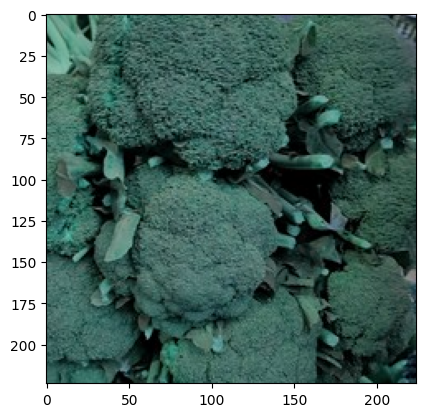

In [20]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [21]:
test_img.shape

(224, 224, 3)

In [22]:
test_img = cv2.resize(test_img, (224,224))

In [23]:
test_img_input = test_img.reshape(1,224,224,3)

In [24]:
import numpy as np
prediction=np.argmax(vegetables_predictor.predict(test_img_input))
predicted_img=class_map[prediction]
predicted_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Broccoli'

In [ ]:
from google.colab import files
files.download("veggies_predictor3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>